In [58]:
import pandas as pd
import numpy as np
import os
import re
from nltk.corpus import stopwords

from scipy import stats
import matplotlib.pyplot as plt

stopwords = set(stopwords.words('english'))

In [59]:
keyword_list = ['obesity','cancer','covid-19','influenza','mental_health']

In [60]:
temp = pd.DataFrame()
year_list = []

for i in range(11):
    year_list.append(i+2010)
    filename = 'Year'+str(i+2010)+'.csv'
    data = pd.read_csv(filename)
    temp = temp.append(data[0:],ignore_index = True)
temp

,Unnamed: 0,Title,Year,journal
0,5,The attenuation of pain behaviour and serum in...,2010,Scand J Pain
1,6,Diagnostic blocks for chronic pain.,2010,Scand J Pain
2,7,Patients referred from a multidisciplinary pai...,2010,Scand J Pain
3,10,Cross-over evaluation of electrically induced ...,2010,Scand J Pain
4,12,Difficult diagnosis of facial pain: A case rep...,2010,Scand J Pain
...,...,...,...,...
15597,2966,Is there a place for genetics in the managemen...,2020,Best Pract Res Clin Anaesthesiol
15598,2967,What is the ideal combination antiemetic regimen?,2020,Best Pract Res Clin Anaesthesiol
15599,2968,Management of postoperative nausea and vomitin...,2020,Best Pract Res Clin Anaesthesiol
15600,2969,Clinical and economic burden of postoperative ...,2020,Best Pract Res Clin Anaesthesiol


# feature engineering

In [125]:
data = temp.dropna()

def remove_stop(x):
    list1 = []
    for i in x.split():
        if i not in stopwords:
            list1.append(i)
    return list1

def lower(x):
    return x.lower()

data['title_lower'] = data['Title'].apply(lambda x: lower(x))
data['title_remove']= data['title_lower'].apply(lambda x: remove_stop(x))
data

,Unnamed: 0,Title,Year,journal,title_lower,title_remove
0,5,The attenuation of pain behaviour and serum in...,2010,Scand J Pain,the attenuation of pain behaviour and serum in...,"[attenuation, pain, behaviour, serum, interleu..."
1,6,Diagnostic blocks for chronic pain.,2010,Scand J Pain,diagnostic blocks for chronic pain.,"[diagnostic, blocks, chronic, pain.]"
2,7,Patients referred from a multidisciplinary pai...,2010,Scand J Pain,patients referred from a multidisciplinary pai...,"[patients, referred, multidisciplinary, pain, ..."
3,10,Cross-over evaluation of electrically induced ...,2010,Scand J Pain,cross-over evaluation of electrically induced ...,"[cross-over, evaluation, electrically, induced..."
4,12,Difficult diagnosis of facial pain: A case rep...,2010,Scand J Pain,difficult diagnosis of facial pain: a case rep...,"[difficult, diagnosis, facial, pain:, case, re..."
...,...,...,...,...,...,...
15597,2966,Is there a place for genetics in the managemen...,2020,Best Pract Res Clin Anaesthesiol,is there a place for genetics in the managemen...,"[place, genetics, management, ponv?]"
15598,2967,What is the ideal combination antiemetic regimen?,2020,Best Pract Res Clin Anaesthesiol,what is the ideal combination antiemetic regimen?,"[ideal, combination, antiemetic, regimen?]"
15599,2968,Management of postoperative nausea and vomitin...,2020,Best Pract Res Clin Anaesthesiol,management of postoperative nausea and vomitin...,"[management, postoperative, nausea, vomiting, ..."
15600,2969,Clinical and economic burden of postoperative ...,2020,Best Pract Res Clin Anaesthesiol,clinical and economic burden of postoperative ...,"[clinical, economic, burden, postoperative, na..."


In [126]:
data['obesity'] = data['title_lower'].apply(lambda x: 1 if 'obesity' in x else 0)
data['cancer'] = data['title_lower'].apply(lambda x: 1 if 'cancer' in x else 0)
data['covid-19'] = data['title_lower'].apply(lambda x: 1 if 'covid-19' in x else 0)
data['influenza'] = data['title_lower'].apply(lambda x: 1 if 'influenza' in x else 0)
data['mental_health'] = data['title_lower'].apply(lambda x: 1 if 'mental' in x and 'health' in x else 0)
data

,Unnamed: 0,Title,Year,journal,title_lower,title_remove,obesity,cancer,covid-19,influenza,mental_health
0,5,The attenuation of pain behaviour and serum in...,2010,Scand J Pain,the attenuation of pain behaviour and serum in...,"[attenuation, pain, behaviour, serum, interleu...",0,0,0,0,0
1,6,Diagnostic blocks for chronic pain.,2010,Scand J Pain,diagnostic blocks for chronic pain.,"[diagnostic, blocks, chronic, pain.]",0,0,0,0,0
2,7,Patients referred from a multidisciplinary pai...,2010,Scand J Pain,patients referred from a multidisciplinary pai...,"[patients, referred, multidisciplinary, pain, ...",0,0,0,0,0
3,10,Cross-over evaluation of electrically induced ...,2010,Scand J Pain,cross-over evaluation of electrically induced ...,"[cross-over, evaluation, electrically, induced...",0,0,0,0,0
4,12,Difficult diagnosis of facial pain: A case rep...,2010,Scand J Pain,difficult diagnosis of facial pain: a case rep...,"[difficult, diagnosis, facial, pain:, case, re...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15597,2966,Is there a place for genetics in the managemen...,2020,Best Pract Res Clin Anaesthesiol,is there a place for genetics in the managemen...,"[place, genetics, management, ponv?]",0,0,0,0,0
15598,2967,What is the ideal combination antiemetic regimen?,2020,Best Pract Res Clin Anaesthesiol,what is the ideal combination antiemetic regimen?,"[ideal, combination, antiemetic, regimen?]",0,0,0,0,0
15599,2968,Management of postoperative nausea and vomitin...,2020,Best Pract Res Clin Anaesthesiol,management of postoperative nausea and vomitin...,"[management, postoperative, nausea, vomiting, ...",0,0,0,0,0
15600,2969,Clinical and economic burden of postoperative ...,2020,Best Pract Res Clin Anaesthesiol,clinical and economic burden of postoperative ...,"[clinical, economic, burden, postoperative, na...",0,0,0,0,0


In [127]:
obesity_frequence = data.groupby('Year')['obesity'].sum().tolist()
cancer_frequence = data.groupby('Year')['cancer'].sum().tolist()
covid_19_frequence = data.groupby('Year')['covid-19'].sum().tolist()
influenza_frequence = data.groupby('Year')['influenza'].sum().tolist()
mental_health_frequence = data.groupby('Year')['mental_health'].sum().tolist()


df_keyword = pd.DataFrame(index = np.arange(2010,2021))

df_keyword['obesity'] = obesity_frequence
df_keyword['cancer'] = cancer_frequence
df_keyword['covid-19'] = covid_19_frequence
df_keyword['influenza'] = influenza_frequence
df_keyword['mental_health'] = mental_health_frequence

    
df_keyword


,obesity,cancer,covid-19,influenza,mental_health
2010,3,83,0,4,2
2011,2,35,0,2,2
2012,2,80,0,1,6
2013,8,60,0,3,3
2014,3,47,0,3,6
2015,10,55,0,1,6
2016,0,40,0,2,3
2017,11,43,0,1,3
2018,3,63,0,4,10
2019,3,53,0,2,4


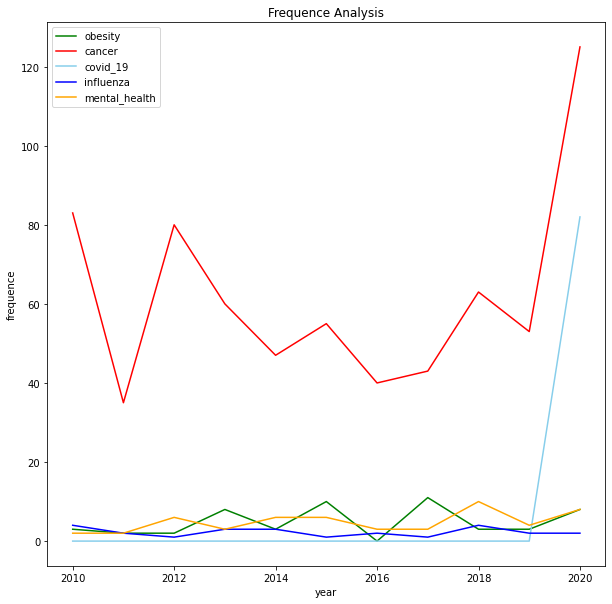

In [128]:
plt.figure(figsize=(10, 10))

plt.title('Frequence Analysis')

plt.plot(year_list, obesity_frequence, color='green', label='obesity')
plt.plot(year_list, cancer_frequence, color='red', label='cancer')
plt.plot(year_list, covid_19_frequence, color='skyblue', label='covid_19')
plt.plot(year_list, influenza_frequence, color='blue', label='influenza')
plt.plot(year_list, mental_health_frequence, color='orange', label='mental_health')

plt.legend() # 显示图例

plt.xlabel('year')
plt.ylabel('frequence')
plt.show()

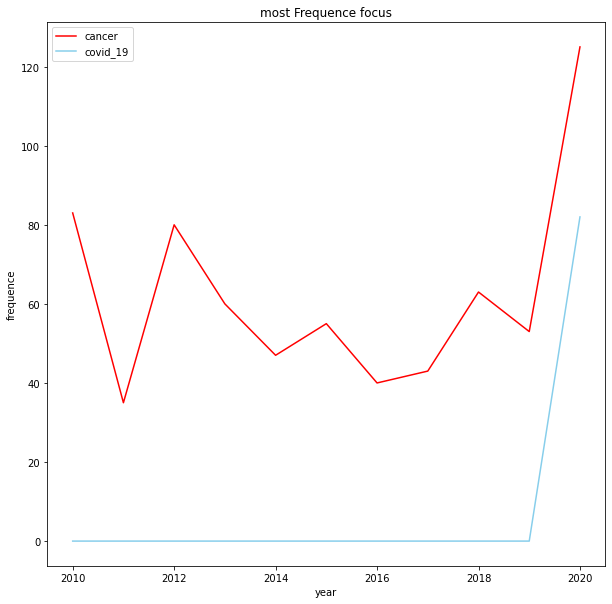

In [155]:
plt.figure(figsize=(10, 10))

plt.title('most Frequence focus')

plt.plot(year_list, cancer_frequence, color='red', label='cancer')
plt.plot(year_list, covid_19_frequence, color='skyblue', label='covid_19')

plt.legend() # 显示图例

plt.xlabel('year')
plt.ylabel('frequence')
plt.show()

In [129]:
def get_stats(x,y):
    return stats.ttest_ind(x,y),stats.kruskal(x,y)

In [130]:
print(get_stats(obesity_frequence,cancer_frequence))

(Ttest_indResult(statistic=-7.293067772370874, pvalue=4.7207020295906307e-07), KruskalResult(statistic=15.89027856736782, pvalue=6.712260995437498e-05))


In [131]:
print(get_stats(obesity_frequence,covid_19_frequence))

(Ttest_indResult(statistic=-0.349742985516795, pvalue=0.7301875415013037), KruskalResult(statistic=9.82580187843346, pvalue=0.0017208066239095946))


In [132]:
print(get_stats(obesity_frequence,influenza_frequence))

(Ttest_indResult(statistic=2.181119334974145, pvalue=0.04128415542422157), KruskalResult(statistic=2.9295253419147183, pvalue=0.08697305982132855))


In [133]:
print(get_stats(obesity_frequence,mental_health_frequence))

(Ttest_indResult(statistic=0.0, pvalue=1.0), KruskalResult(statistic=0.07204116638079265, pvalue=0.7883877025536788))


In [134]:
print(get_stats(cancer_frequence,covid_19_frequence))

(Ttest_indResult(statistic=5.077249941293895, pvalue=5.7562569182012065e-05), KruskalResult(statistic=12.611174006566293, pvalue=0.0003834475931272356))


In [135]:
print(get_stats(cancer_frequence,influenza_frequence))

(Ttest_indResult(statistic=7.687882751187367, pvalue=2.1437210052884256e-07), KruskalResult(statistic=15.926495726495725, pvalue=6.585040891901314e-05))


In [136]:
print(get_stats(cancer_frequence,mental_health_frequence))

(Ttest_indResult(statistic=7.3308684051252895, pvalue=4.373080614291378e-07), KruskalResult(statistic=15.863223609534618, pvalue=6.808907729553071e-05))


In [137]:
print(get_stats(covid_19_frequence,influenza_frequence))

(Ttest_indResult(statistic=0.6944303439064793, pvalue=0.49540082858121803), KruskalResult(statistic=11.767924528301883, pvalue=0.0006026013040433906))


In [138]:
print(get_stats(covid_19_frequence,mental_health_frequence))

(Ttest_indResult(statistic=0.35171803732963103, pvalue=0.7287282881823129), KruskalResult(statistic=11.716343143393859, pvalue=0.0006195357867210893))


In [139]:
print(get_stats(influenza_frequence,mental_health_frequence))

(Ttest_indResult(statistic=-2.988207651056304, pvalue=0.007266147565416416), KruskalResult(statistic=6.642605633802809, pvalue=0.009956820198239527))


In [140]:
from afinn import Afinn


def get_afi_score(x):
    afinn = Afinn()
    score = afinn.score(x)
    return score

df_sentiment = pd.DataFrame(index = keyword_list)

c = []
for i in keyword_list:
    c.append(get_afi_score(i))
    
df_sentiment['sentiment'] = c
df_sentiment

,sentiment
obesity,0.0
cancer,-1.0
covid-19,0.0
influenza,0.0
mental_health,0.0


In [190]:
data_all_sentiment = pd.read_csv('sentiment.csv')
data_all_sentiment

,df,affin_list,nrc_list,bing_list
0,obesity,0,-1,0
1,cancer,-1,-1,-1
2,covid-19,0,0,0
3,influenza,0,-1,0
4,mental_health,0,0,0


<ipython-input-156-21012bafbd82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_obesity['sentiment'] = data_obesity['title_lower'].apply(lambda x: get_afi_score(x))


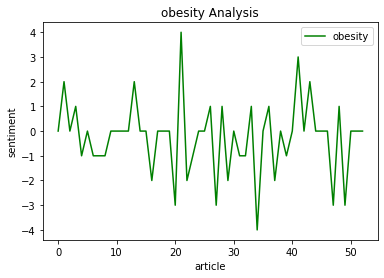

In [156]:
data_obesity = data[data['title_lower'].str.contains('obesity')]
data_obesity['sentiment'] = data_obesity['title_lower'].apply(lambda x: get_afi_score(x))
plt.title('obesity Analysis')

plt.plot(data_obesity['sentiment'].tolist(), color='green', label='obesity')

plt.legend() # 显示图例

plt.xlabel('article')
plt.ylabel('sentiment')
plt.show()


<ipython-input-157-802b654a9c3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cancer['sentiment'] = data_cancer['title_lower'].apply(lambda x: get_afi_score(x))


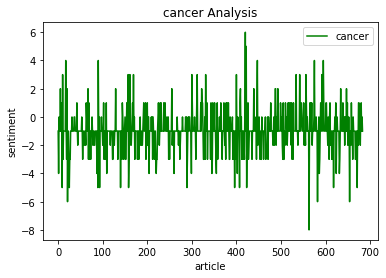

In [157]:
data_cancer = data[data['title_lower'].str.contains('cancer')]
data_cancer['sentiment'] = data_cancer['title_lower'].apply(lambda x: get_afi_score(x))
plt.title('cancer Analysis')

plt.plot(data_cancer['sentiment'].tolist(), color='green', label='cancer')

plt.legend() # 显示图例

plt.xlabel('article')
plt.ylabel('sentiment')
plt.show()

<ipython-input-158-05b77a384143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_covid_19['sentiment'] = data_covid_19['title_lower'].apply(lambda x: get_afi_score(x))


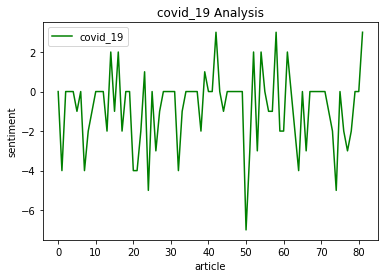

In [158]:
data_covid_19 = data[data['title_lower'].str.contains('covid-19')]
data_covid_19['sentiment'] = data_covid_19['title_lower'].apply(lambda x: get_afi_score(x))
plt.title('covid_19 Analysis')

plt.plot(data_covid_19['sentiment'].tolist(), color='green', label='covid_19')

plt.legend() # 显示图例

plt.xlabel('article')
plt.ylabel('sentiment')
plt.show()

<ipython-input-159-69bc30281b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_influenza['sentiment'] = data_influenza['title_lower'].apply(lambda x: get_afi_score(x))


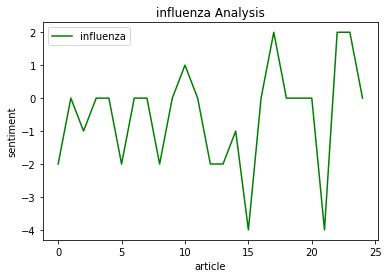

In [159]:
data_influenza = data[data['title_lower'].str.contains('influenza')]
data_influenza['sentiment'] = data_influenza['title_lower'].apply(lambda x: get_afi_score(x))
plt.title('influenza Analysis')

plt.plot(data_influenza['sentiment'].tolist(), color='green', label='influenza')

plt.legend() # 显示图例

plt.xlabel('article')
plt.ylabel('sentiment')
plt.show()

<ipython-input-160-dedee010355c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mentalhealth['sentiment'] = data_mentalhealth['title_lower'].apply(lambda x: get_afi_score(x))


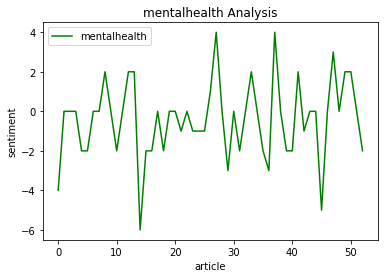

In [160]:
data_1 = data[data['title_lower'].str.contains('mental')]
data_mentalhealth = data_1[data_1['title_lower'].str.contains('health')]
data_mentalhealth['sentiment'] = data_mentalhealth['title_lower'].apply(lambda x: get_afi_score(x))
plt.title('mentalhealth Analysis')

plt.plot(data_mentalhealth['sentiment'].tolist(), color='green', label='mentalhealth')

plt.legend() # 显示图例

plt.xlabel('article')
plt.ylabel('sentiment')
plt.show()

In [166]:
def get_afi_score1(x):
    afinn = Afinn()
    score = afinn.score(x)
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
    
data_all = data[['title_lower','Year']]
data_all['sentiment'] = data['title_lower'].apply(lambda x: get_afi_score1(x))


<ipython-input-166-cbd6c14afd53>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all['sentiment'] = data['title_lower'].apply(lambda x: get_afi_score1(x))


,title_lower,Year,sentiment
0,the attenuation of pain behaviour and serum in...,2010,negative
1,diagnostic blocks for chronic pain.,2010,negative
2,patients referred from a multidisciplinary pai...,2010,negative
3,cross-over evaluation of electrically induced ...,2010,negative
4,difficult diagnosis of facial pain: a case rep...,2010,negative
...,...,...,...
15597,is there a place for genetics in the managemen...,2020,neutral
15598,what is the ideal combination antiemetic regimen?,2020,neutral
15599,management of postoperative nausea and vomitin...,2020,negative
15600,clinical and economic burden of postoperative ...,2020,negative


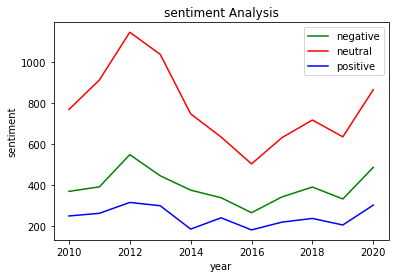

In [188]:

negative_list = []
neutral_list = []
positive_list = []
year_list = []
for i in range(11):
    negative_list.append(t[i])
    neutral_list.append(t[i+11])
    positive_list.append(t[i+22])
    year_list.append(i+2010)
plt.title('sentiment Analysis')


plt.plot(year_list,negative_list, color='green', label='negative')
plt.plot(year_list,neutral_list, color='red', label='neutral')
plt.plot(year_list,positive_list, color='blue', label='positive')


plt.legend() # 显示图例

plt.xlabel('year')
plt.ylabel('sentiment')
plt.show()

In [146]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(min_df = 1,stop_words = 'english')

document_term_matrix = vecttorizer.fit_transform(data.title_lower.to_list())

pd.DataFrame(document_term_matrix.toarray(),index =data.title_lower.to_list(),columns = vectorizer.get_feature_names()).head(10)

,000,0001,001,007,01,011,0187,018roth,02,022mbt,...,β4,γh2ax,γδ,ιnflammatory,ιs,κb,μm,μxrf,σδ,φ6
the attenuation of pain behaviour and serum interleukin-6 concentration by nimesulide in a rat model of neuropathic pain.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diagnostic blocks for chronic pain.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"patients referred from a multidisciplinary pain clinic to the social worker, their general health, pain condition, treatment and outcome.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cross-over evaluation of electrically induced pain and hyperalgesia.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
difficult diagnosis of facial pain: a case report and mini-review.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"patients referred from a multidisciplinary pain clinic to the social worker, their socio-demographic profile and the contribution of the social worker to the management of the patients.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a population based study of the prevalence of pain in iceland.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"a 6-months, randomised, placebo-controlled evaluation of efficacy and tolerability of a low-dose 7-day buprenorphine transdermal patch in osteoarthritis patients naïve to potent opioids.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"predicting of pain, disability, and sick leave regarding a non-clinical sample among swedish nurses.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brain activation due to postoperative pain from the right hand measured with regional cerebral blood flow using positron emission tomography.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.decomposition import TruncatedSVD
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,module="pandas", lineno=570)
from sklearn.preprocessing import Normalizer
n_topic = 10
lsa_model = TruncatedSVD(n_components = n_topic)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_topic_matrix = Normalizer(copy =False).fit_transform(lsa_topic_matrix)
pd.DataFrame(lsa_topic_matrix,index = data.title_lower.to_list(),columns = ['1','2','3','4','5','6','7','8','9','10'])

,1,2,3,4,5,6,7,8,9,10
the attenuation of pain behaviour and serum interleukin-6 concentration by nimesulide in a rat model of neuropathic pain.,0.524188,-0.280376,-0.205693,0.071964,-0.282442,-0.461155,0.259970,-0.354701,-0.126126,0.312066
diagnostic blocks for chronic pain.,0.572353,-0.229966,-0.212709,-0.111902,-0.262639,-0.301915,0.456155,-0.277084,-0.032072,0.340216
"patients referred from a multidisciplinary pain clinic to the social worker, their general health, pain condition, treatment and outcome.",0.507139,-0.319829,-0.424187,-0.198260,-0.210273,-0.135787,0.520997,-0.287726,0.017168,0.064072
cross-over evaluation of electrically induced pain and hyperalgesia.,0.520534,-0.299590,0.000872,0.285786,-0.239823,-0.671022,-0.015031,-0.150315,-0.029037,0.161759
difficult diagnosis of facial pain: a case report and mini-review.,0.590415,0.775667,0.014558,-0.046728,-0.142729,0.093321,0.012406,-0.083665,-0.099660,-0.034476
...,...,...,...,...,...,...,...,...,...,...
is there a place for genetics in the management of ponv?,0.446008,0.015627,-0.000815,0.123441,-0.293546,-0.228432,0.250002,0.101475,-0.247738,0.716290
what is the ideal combination antiemetic regimen?,0.483022,-0.241431,-0.286512,0.231786,-0.013625,-0.565188,-0.381617,-0.269435,0.139489,-0.123613
management of postoperative nausea and vomiting in the context of an enhanced recovery after surgery program.,0.588808,-0.153847,-0.069352,0.146584,-0.392377,-0.189843,0.244476,-0.047936,-0.209049,0.554591
clinical and economic burden of postoperative nausea and vomiting: analysis of existing cost data.,0.349959,-0.158912,-0.153265,0.508087,-0.493628,0.108030,0.262435,0.481159,0.013890,-0.121305


In [148]:
from sklearn.decomposition import LatentDirichletAllocation
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
from sklearn.preprocessing import Normalizer

lda_model = LatentDirichletAllocation(n_components = n_topic,learning_method = 'online', random_state = 0, verbose =0)
lda_topic_matrix = lda_model.fit_transform(document_term_matrix)
lda_topic_matrix = Normalizer(copy =False).fit_transform(lsa_topic_matrix)
pd.DataFrame(lda_topic_matrix,index = data.title_lower.to_list(),columns = ['1','2','3','4','5','6','7','8','9','10'])

,1,2,3,4,5,6,7,8,9,10
the attenuation of pain behaviour and serum interleukin-6 concentration by nimesulide in a rat model of neuropathic pain.,0.524188,-0.280376,-0.205693,0.071964,-0.282442,-0.461155,0.259970,-0.354701,-0.126126,0.312066
diagnostic blocks for chronic pain.,0.572353,-0.229966,-0.212709,-0.111902,-0.262639,-0.301915,0.456155,-0.277084,-0.032072,0.340216
"patients referred from a multidisciplinary pain clinic to the social worker, their general health, pain condition, treatment and outcome.",0.507139,-0.319829,-0.424187,-0.198260,-0.210273,-0.135787,0.520997,-0.287726,0.017168,0.064072
cross-over evaluation of electrically induced pain and hyperalgesia.,0.520534,-0.299590,0.000872,0.285786,-0.239823,-0.671022,-0.015031,-0.150315,-0.029037,0.161759
difficult diagnosis of facial pain: a case report and mini-review.,0.590415,0.775667,0.014558,-0.046728,-0.142729,0.093321,0.012406,-0.083665,-0.099660,-0.034476
...,...,...,...,...,...,...,...,...,...,...
is there a place for genetics in the management of ponv?,0.446008,0.015627,-0.000815,0.123441,-0.293546,-0.228432,0.250002,0.101475,-0.247738,0.716290
what is the ideal combination antiemetic regimen?,0.483022,-0.241431,-0.286512,0.231786,-0.013625,-0.565188,-0.381617,-0.269435,0.139489,-0.123613
management of postoperative nausea and vomiting in the context of an enhanced recovery after surgery program.,0.588808,-0.153847,-0.069352,0.146584,-0.392377,-0.189843,0.244476,-0.047936,-0.209049,0.554591
clinical and economic burden of postoperative nausea and vomiting: analysis of existing cost data.,0.349959,-0.158912,-0.153265,0.508087,-0.493628,0.108030,0.262435,0.481159,0.013890,-0.121305


In [149]:
def top_word(model,feature_names,n_top_words):
    for topic_idx,topic in enumerate(model.components_):
        print('Topic #%d:'%topic_idx)
        print(' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 :-1]]))

n_top_words = 20
tf_feature_names = vectorizer.get_feature_names()
top_word(lsa_model,tf_feature_names,n_top_words)

Topic #0:
study patients case report review cancer treatment literature cell analysis clinical disease using based management effect pain care evaluation carcinoma
Topic #1:
case report review literature rare syndrome presenting systematic series patient presentation cases unusual cyst carcinoma tumor giant congenital old diagnosis
Topic #2:
study case prospective comparative cross pilot sectional retrospective population report based year control observational children vitro cohort mandibular physical health
Topic #3:
cancer using analysis effect review treatment cell based cells breast systematic human clinical health induced evaluation activity meta quality quot
Topic #4:
cancer cell case breast carcinoma report cells study lung rare prostate therapy small tumor non expression metastatic colorectal stem squamous
Topic #5:
review cancer study literature systematic analysis breast meta prostate cases retrospective factors colorectal lung prospective metastatic risk cells care tertiary

In [150]:
top_word(lda_model,tf_feature_names,n_top_words)

Topic #0:
quot high development using different drug functional model molecular vitro characterization indian detection status resistance medicine new effects synthesis india
Topic #1:
patients health study treatment role based pain effects prevalence injury population gene changes long term liver chronic trial influence women
Topic #2:
case review report cancer cell rare management literature type surgical treatment systematic carcinoma patients acute method breast artery new tumor
Topic #3:
impact properties levels free cardiac nasal delivery fractures conditions mediated reconstruction low stage flap screening mouse ventricular environmental biomarkers fistula
Topic #4:
syndrome effect human quality induced protein bone acid physical evaluation stress rats activity diabetes using dna research pressure storage treatment
Topic #5:
patient therapy cancer assessment study approach following patients infection life comparison early related factors blood potential cells cell lung time
Top

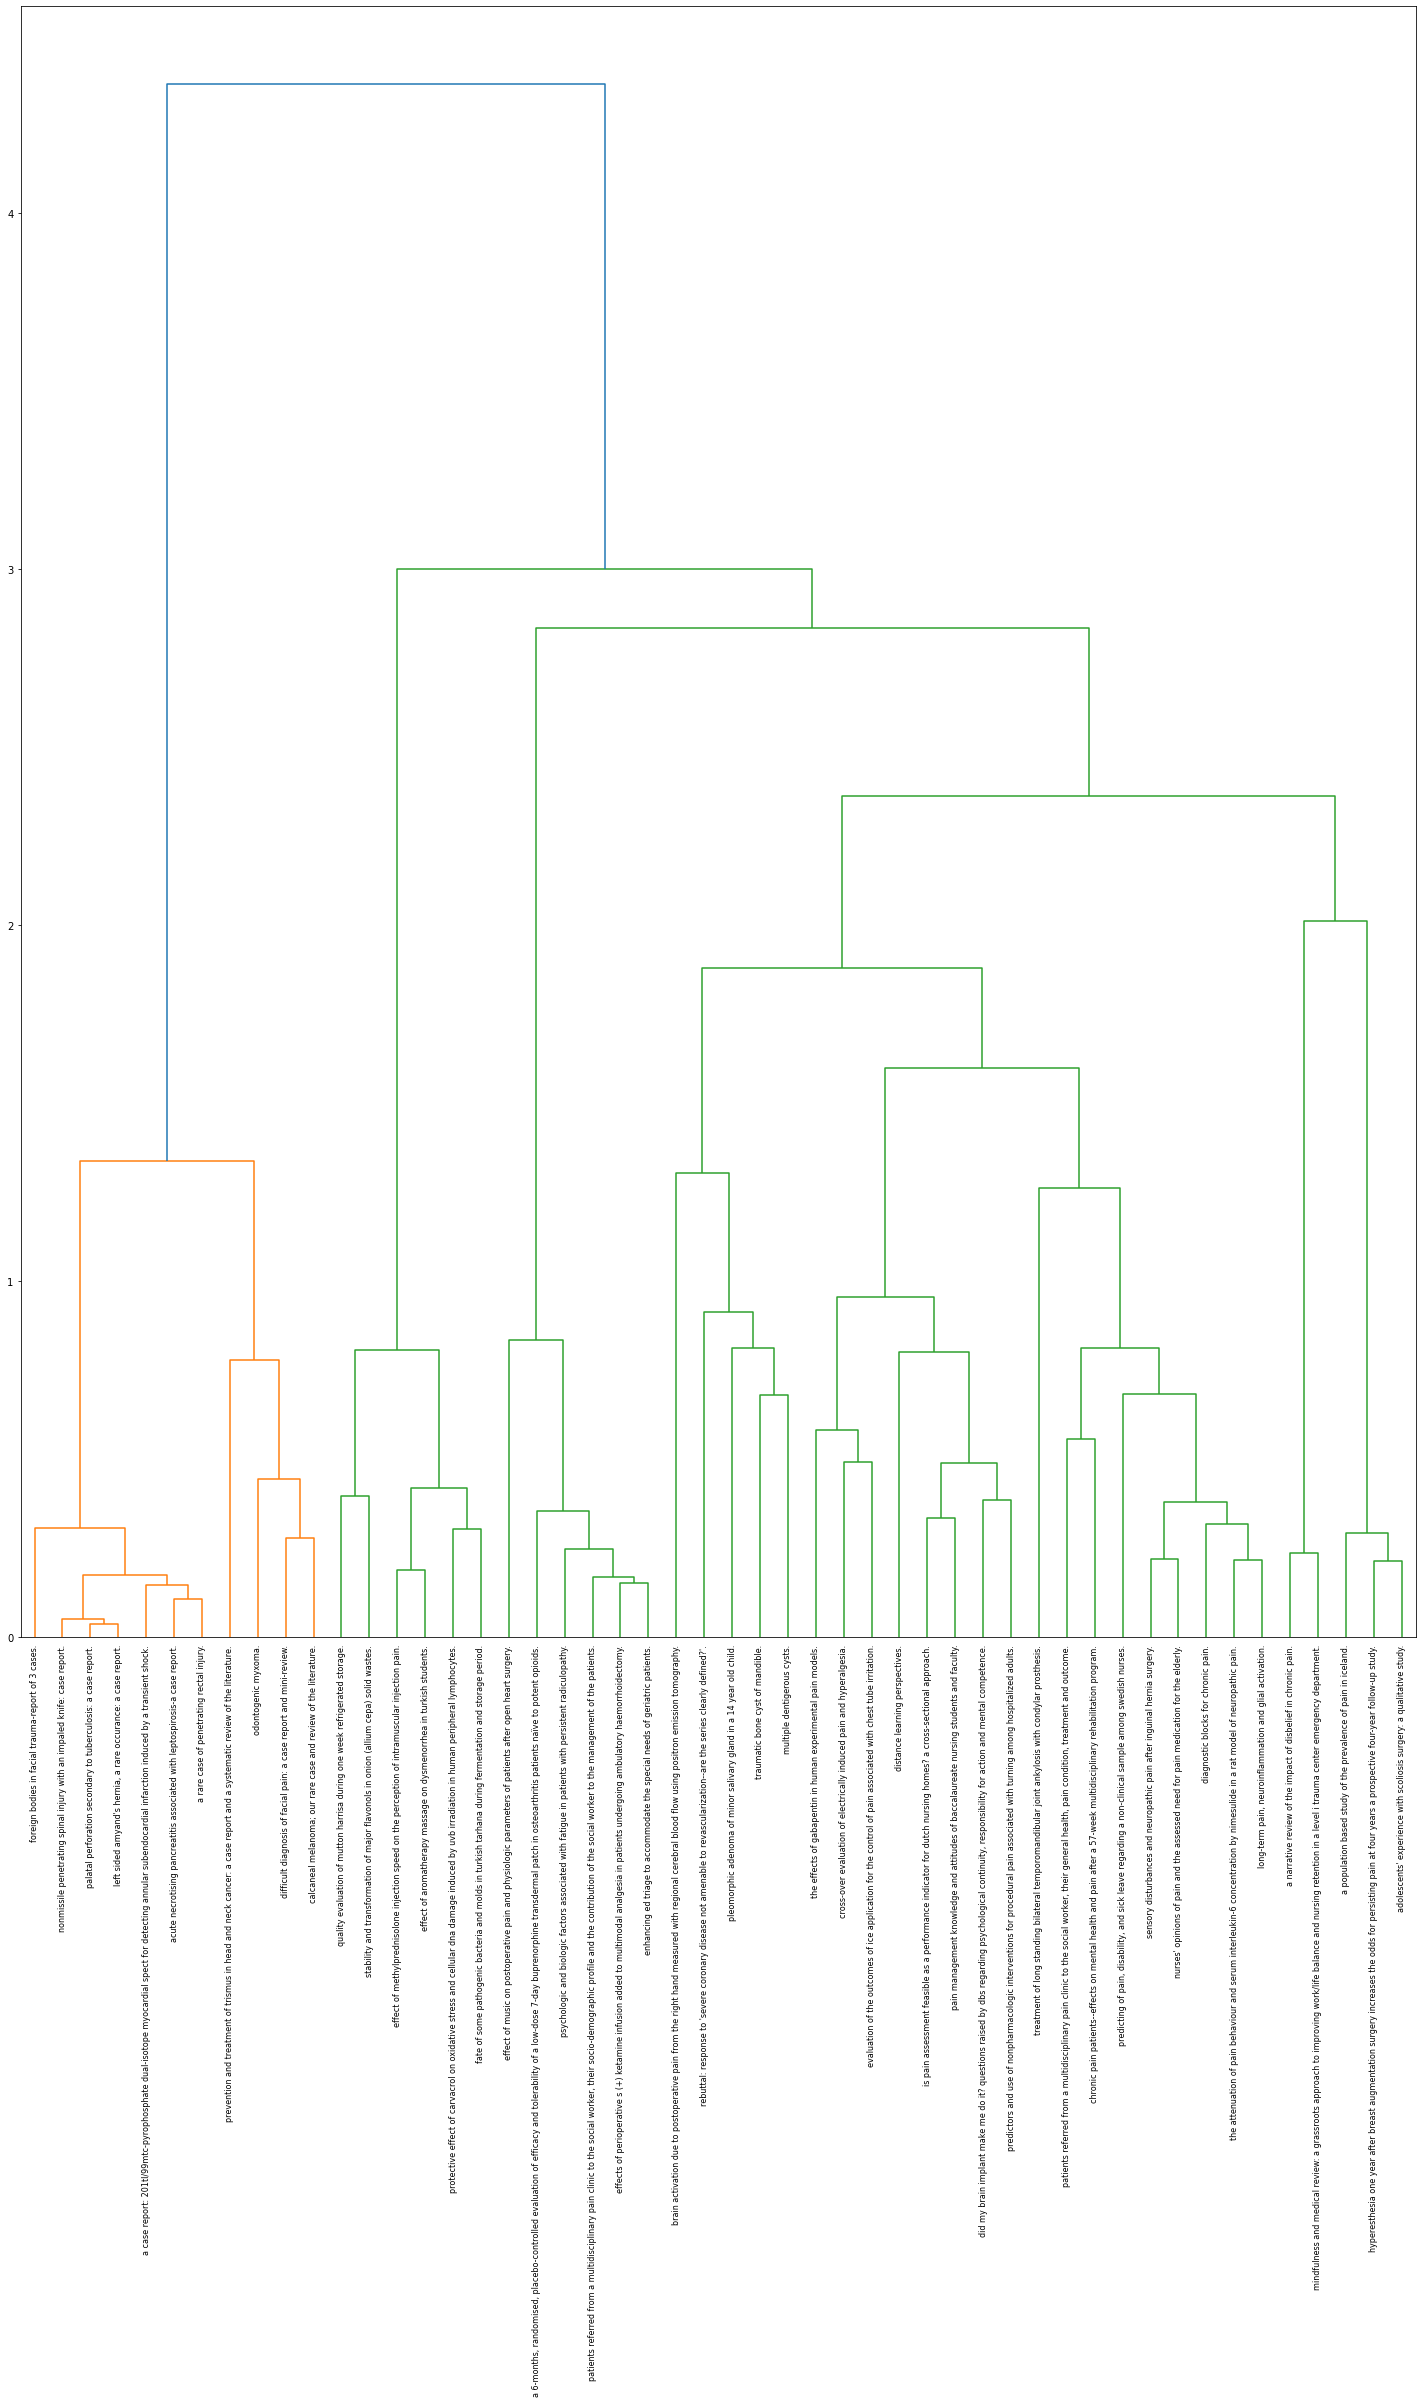

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = lsa_topic_matrix[0:50]
Y = data.title_lower.to_list()[0:50]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 30))
dn = dendrogram(Z,labels = Y)
plt.savefig('lsa.png',dpi = 400) # 100 samples

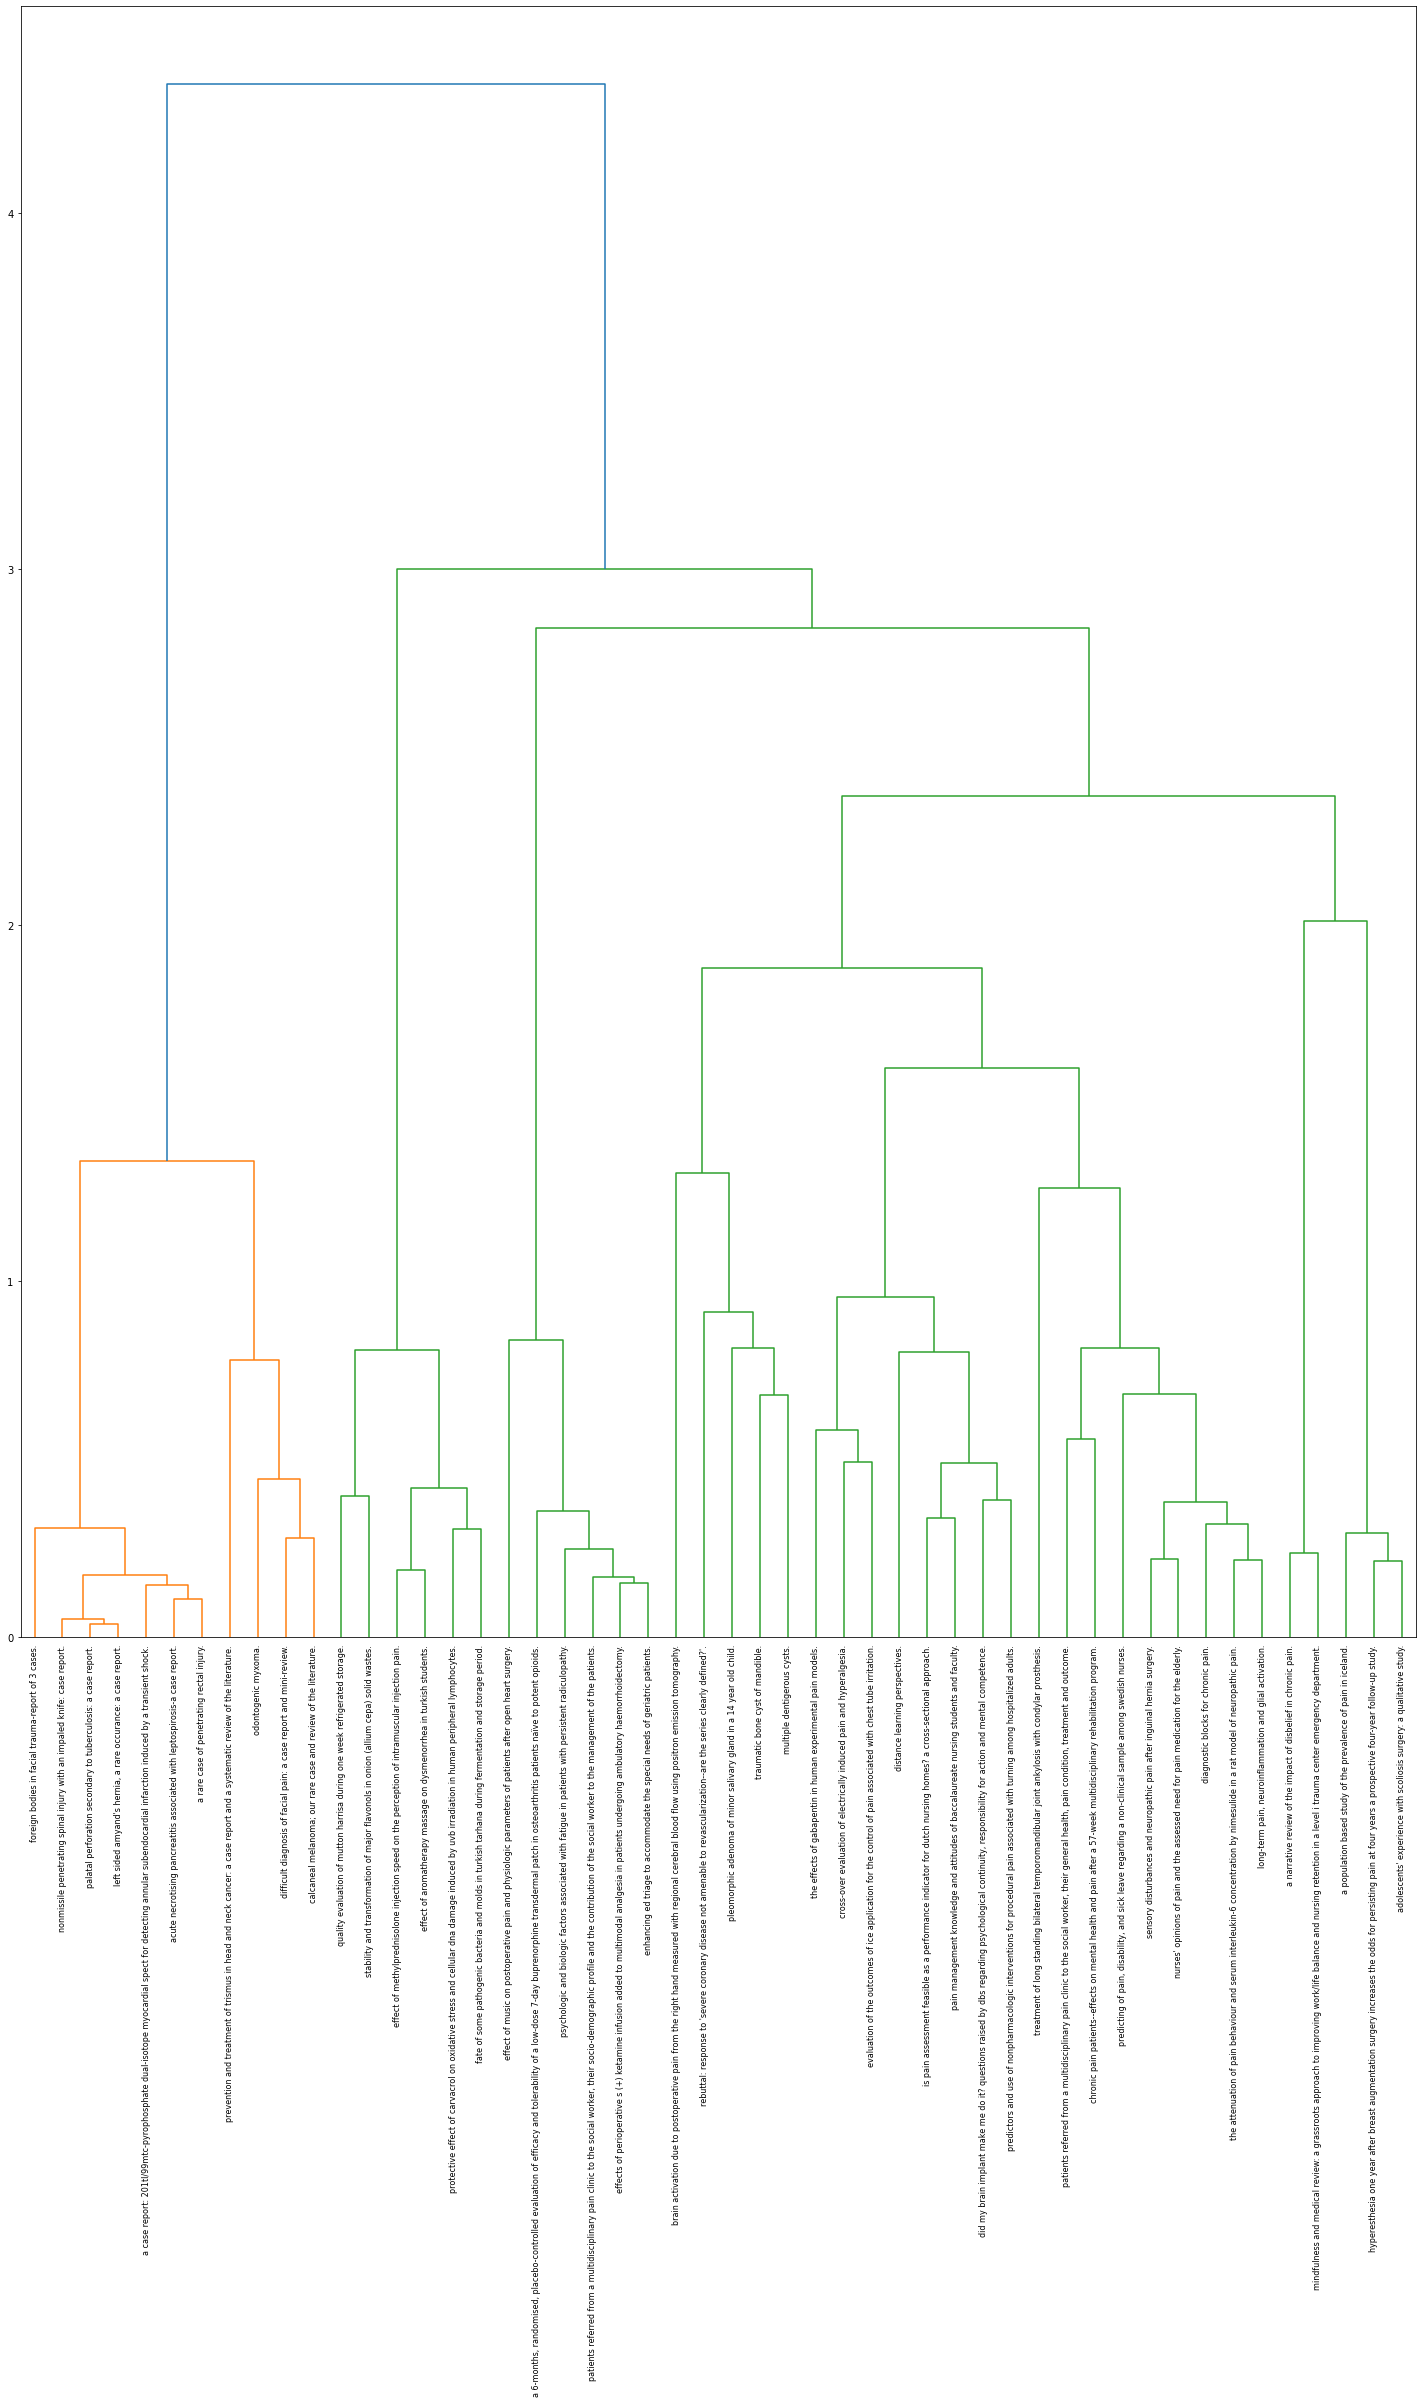

In [194]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = lda_topic_matrix[0:50]
Y = data.title_lower.to_list()[0:50]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 30))
dn = dendrogram(Z,labels = Y)
plt.savefig('lda.png',dpi = 400) # 100 samples

In [153]:
from rake_nltk import Metric,Rake

theme = []
for i in data.title_lower.to_list():
    r = Rake()
    r.extract_keywords_from_text(i)
    b = r.get_ranked_phrases()
    theme.append(b)
theme_pd = pd.DataFrame({'title':data.title_lower.to_list(),'theme':theme})    
theme_pd

,title,theme
0,the attenuation of pain behaviour and serum in...,"[serum interleukin, rat model, pain behaviour,..."
1,diagnostic blocks for chronic pain.,"[diagnostic blocks, chronic pain]"
2,patients referred from a multidisciplinary pai...,"[multidisciplinary pain clinic, pain condition..."
3,cross-over evaluation of electrically induced ...,"[electrically induced pain, hyperalgesia, eval..."
4,difficult diagnosis of facial pain: a case rep...,"[facial pain, difficult diagnosis, case report..."
...,...,...
15597,is there a place for genetics in the managemen...,"[ponv, place, management, genetics]"
15598,what is the ideal combination antiemetic regimen?,[ideal combination antiemetic regimen]
15599,management of postoperative nausea and vomitin...,"[surgery program, postoperative nausea, enhanc..."
15600,clinical and economic burden of postoperative ...,"[existing cost data, postoperative nausea, eco..."


In [154]:
from efficient_apriori import apriori

# document_term_matrix = vectorizer.fit_transform(data.title_lower.to_list())
for i in range(11):
    temp1 = []
    a = data[data['Year'] == i+2010]['title_remove'].to_list()
    for j in a:
        temp1.append(j)
    itemsets,rules = apriori(temp1,min_support=0.01,min_confidence=0.01)
    print('year:%d'%(i+2010))
    print(rules)
    print(itemsets)

year:2010
[{neck} -> {head}, {head} -> {neck}, {review} -> {literature.}, {literature.} -> {review}, {report.} -> {case}, {case} -> {report.}, {fine-needle} -> {aspiration}, {aspiration} -> {fine-needle}]
{1: {('model',): 19, ('serum',): 17, ('pain',): 29, ('chronic',): 25, ('diagnostic',): 22, ('patients',): 54, ('treatment',): 55, ('induced',): 17, ('evaluation',): 49, ('diagnosis',): 19, ('case',): 63, ('report',): 26, ('management',): 22, ('patients.',): 16, ('study',): 43, ('among',): 17, ('using',): 58, ('human',): 23, ('effects',): 31, ('study.',): 28, ('surgery',): 15, ('breast',): 18, ('head',): 16, ('literature.',): 14, ('neck',): 22, ('review',): 29, ('effect',): 62, ('bone',): 16, ('report.',): 36, ('cases.',): 19, ('rare',): 14, ('quality',): 20, ('impact',): 14, ('use',): 26, ('health',): 31, ('medical',): 26, ('approach',): 22, ('factors',): 17, ('performance',): 14, ('assessment',): 17, ('outcomes',): 20, ('comparison',): 23, ('patient',): 17, ('development',): 23, ('ro

year:2014
[{report} -> {case}, {case} -> {report}, {report.} -> {case}, {case} -> {report.}, {gene} -> {expression}, {expression} -> {gene}]
{1: {('oral',): 15, ('role',): 28, ('review',): 23, ('pediatric',): 17, ('patients.',): 20, ('study.',): 32, ('study',): 44, ('pain',): 17, ('chronic',): 32, ('clinical',): 32, ('among',): 29, ('factors',): 21, ('treatment',): 55, ('using',): 52, ('review.',): 21, ('gastrointestinal',): 16, ('health',): 15, ('effects',): 32, ('patients',): 58, ('human',): 33, ('-',): 20, ('syndrome',): 16, ('first',): 18, ('case',): 71, ('report',): 34, ('patient',): 33, ('cancer',): 26, ('therapy',): 16, ('tumor',): 14, ('induced',): 18, ('changes',): 18, ('cell',): 28, ('molecular',): 20, ('use',): 14, ('diagnosis',): 18, ('management',): 25, ('report.',): 23, ('associated',): 24, ('acute',): 29, ('response',): 21, ('two',): 18, ('approach',): 15, ('prevalence',): 34, ('risk',): 21, ('disease',): 19, ('detection',): 18, ('efficacy',): 15, ('different',): 18, ('a

year:2019
[{systematic} -> {review.}, {review.} -> {systematic}, {spinal} -> {cord}, {cord} -> {spinal}, {risk} -> {factors}, {factors} -> {risk}, {report.} -> {case}, {case} -> {report.}, {report} -> {case}, {case} -> {report}]
{1: {('based',): 19, ('data',): 13, ('quality',): 18, ('aortic',): 13, ('diagnosis',): 15, ('novel',): 23, ('review.',): 31, ('using',): 36, ('analysis',): 37, ('effect',): 26, ('new',): 20, ('life',): 12, ('influence',): 15, ('effects',): 20, ('assessment',): 23, ('patient',): 18, ('knee',): 12, ('surgical',): 17, ('chronic',): 24, ('treatment',): 32, ('comparison',): 21, ('study.',): 60, ('study',): 53, ('systematic',): 26, ('medicine',): 12, ('review',): 27, ('surgery',): 16, ('health',): 28, ('disease',): 32, ('management',): 31, ('-',): 21, ('case',): 72, ('cell',): 18, ('cancer',): 24, ('cancer.',): 15, ('risk',): 25, ('associated',): 22, ('among',): 45, ('evaluation',): 23, ('spinal',): 25, ('identification',): 12, ('cord',): 21, ('screening',): 16, ('pu